Group #3

1. Get the 15 variables from this raster for all Peru departments polygons. This is the link where shapefiles are located. This is the link of the source raster. The values should be the percentage of district area cover by this specific Morphological Settlement Zone.

In [1]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 55.7 MB/s eta 0:00:00


In [2]:
%pip install geopandas matplotlib shapely rasterio numpy pandas sklearn-xarray -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00


In [4]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir] [--paths] [--json]
               [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: bundlerextension console dejavu execute kernel kernelspec migrate nbclassic
nbconvert nbextension notebook run server serverextension troubleshoot trust

Jupyter command `jupyter-labextension` not found.


In [5]:
!pip install rasterstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.2 MB/s eta 0:00:00


In [6]:
%pip install geopandas matplotlib shapely rasterio numpy pandas sklearn-xarray -q

In [7]:
%pip install git+https://github.com/jgrss/geowombat  -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 11.5 MB/s eta 0:00:00


In [9]:
import geopandas as gpd
from rasterstats import zonal_stats
import pandas as pd
import geowombat as gw

import geopandas as gpd

from rasterio.merge import merge
from rasterio.plot import show
from shapely.geometry import mapping
import rasterio

from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

import os
from rasterio.mask import mask

In [10]:
#Utilizando google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import geopandas as gpd

In [11]:
# Establecemos la ruta
shapefile_path = '/content/drive/MyDrive/group3_ass10_10/INEI_LIMITE_DEPARTAMENTAL/INEI_LIMITE_DEPARTAMENTAL.shp'

# Leemos el shapefile
departments = gpd.read_file('/content/drive/MyDrive/group3_ass10_10/INEI_LIMITE_DEPARTAMENTAL/INEI_LIMITE_DEPARTAMENTAL.shp')

# Establemos la proyección esapcial
# Rasters en 'esri:54009' (ponemos un supuesto)
departments = departments.to_crs('esri:54009')

print(departments.head())

  CCDD    NOMBDEP CCPP    NOMBPROV CCDI      NOMBDIST          CAPITAL  \
0   06  CAJAMARCA   05   CONTUMAZA   04      GUZMANGO         GUZMANGO   
1   06  CAJAMARCA   11  SAN MIGUEL   05      EL PRADO         EL PRADO   
2   06  CAJAMARCA   11  SAN MIGUEL   09        NIEPOS           NIEPOS   
3   06  CAJAMARCA   11  SAN MIGUEL   10  SAN GREGORIO     SAN GREGORIO   
4   06  CAJAMARCA   12   SAN PABLO   03      SAN LUIS  SAN LUIS GRANDE   

   UBIGEO IDPROV  CODIGO  CNT_CCPP    DESCRIPCIO           DESCARGAR  \
0  060504   0605  060504        50      GUZMANGO  www.geogpsperu.com   
1  061105   0611  061105        15      EL PRADO  www.geogpsperu.com   
2  061109   0611  061109        41        NIEPOS  www.geogpsperu.com   
3  061110   0611  061110        48  SAN GREGORIO  www.geogpsperu.com   
4  061203   0612  061203         9      SAN LUIS  www.geogpsperu.com   

    WHATSAPP                  CONTACTO  \
0  931381206  juan.suyo@geogpsperu.com   
1  931381206  juan.suyo@geogpsperu.com

In [12]:
import rasterio
from rasterio.merge import merge
import rasterio
from rasterio.mask import mask
import pandas as pd

In [ ]:
import glob

# Definimos el camino base donde se encuentran tus archivos .tif
base_path = '/content/drive/MyDrive/Assign 10/tif_files/'

# Utilizamos glob para encontrar todos los archivos
raster_files = glob.glob(base_path + '*.tif')

for file in raster_files:
    print(file)

In [ ]:
from rasterstats import zonal_stats
# Creamos lista para nuestri rusteer
all_stats = []

# Creamos un loop sobre cada archivo raster
for raster_path in raster_files:
    # Ubicando las estadísticas zonales
    stats = zonal_stats(departments, raster_path, stats="count sum", categorical=True, all_touched=True)
    # Convirtiendo a dataframe
    stats_df = pd.DataFrame(stats)
    # Concatenamos con la geometría y la información de los departamentos
    df = pd.concat([departments.reset_index(drop=True), stats_df], axis=1)
    all_stats.append(df)

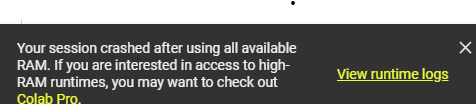

In [ ]:
#Solicita Colab Pro
#El código sse cuelga, presentó el error con colab regular